In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [51]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Kawi/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

KAWI_DIGIT_ONE.png 30954
KAWI_DIGIT_SIX.png 41421
KAWI_DIGIT_SEVEN.png 46044
KAWI_DIGIT_THREE.png 50610
KAWI_DIGIT_ZERO.png 31197
KAWI_DOUBLE_DANDA.png 1528380
KAWI_LETTER_DDHA.png 864477
KAWI_LETTER_DDA.png 776430
KAWI_LETTER_DHA.png 866979
KAWI_LETTER_E.png 874302
KAWI_LETTER_I.png 871116
KAWI_LETTER_JA.png 684618
KAWI_LETTER_II.png 759546
KAWI_LETTER_KHA.png 950595
KAWI_LETTER_LA.png 964716
KAWI_LETTER_NGA.png 632235
KAWI_LETTER_NYA.png 729924
KAWI_LETTER_O.png 802914
KAWI_LETTER_NA.png 794172
KAWI_CONJOINER.png 25590
KAWI_DANDA.png 23640
KAWI_VOWEL_SIGN_ALTERNATE_AA.png 244776
KAWI_VOWEL_SIGN_AI.png 252405
KAWI_PUNCTUATION_FLOWER.png 49287
KAWI_PUNCTUATION_DOUBLE_DOT.png 10623
KAWI_PUNCTUATION_FILLED_CIRCLE.png 31530
KAWI_PUNCTUATION_DOT.png 5355
KAWI_LETTER_VOCALIC_LL.png 856554
KAWI_LETTER_VOCALIC_L.png 785487
KAWI_DIGIT_EIGHT.png 31503
KAWI_VOWEL_SIGN_E.png 159486
KAWI_DIGIT_TWO.png 52482
KAWI_LETTER_GA.png 653682
KAWI_LETTER_SA.png 974115
KAWI_LETTER_RA.png 653616
KAWI_LETTER_M

In [ ]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [52]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Kawi/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

KAWI_DIGIT_ONE.png 30954
KAWI_DIGIT_SIX.png 41421
KAWI_DIGIT_SEVEN.png 46044
KAWI_DIGIT_THREE.png 50610
KAWI_DIGIT_ZERO.png 31197
KAWI_DOUBLE_DANDA.png 1528380
KAWI_LETTER_DDHA.png 864477
KAWI_LETTER_DDA.png 776430
KAWI_LETTER_DHA.png 866979
KAWI_LETTER_E.png 874302
KAWI_LETTER_I.png 871116
KAWI_LETTER_JA.png 684618
KAWI_LETTER_II.png 759546
KAWI_LETTER_KHA.png 950595
KAWI_LETTER_LA.png 964716
KAWI_LETTER_NGA.png 632235
KAWI_LETTER_NYA.png 729924
KAWI_LETTER_O.png 802914
KAWI_LETTER_NA.png 794172
KAWI_CONJOINER.png 25590
KAWI_DANDA.png 23640
KAWI_VOWEL_SIGN_ALTERNATE_AA.png 244776
KAWI_VOWEL_SIGN_AI.png 252405
KAWI_PUNCTUATION_FLOWER.png 49287
KAWI_PUNCTUATION_DOUBLE_DOT.png 10623
KAWI_PUNCTUATION_FILLED_CIRCLE.png 31530
KAWI_PUNCTUATION_DOT.png 5355
KAWI_LETTER_VOCALIC_LL.png 856554
KAWI_LETTER_VOCALIC_L.png 785487
KAWI_DIGIT_EIGHT.png 31503
KAWI_VOWEL_SIGN_E.png 159486
KAWI_DIGIT_TWO.png 52482
KAWI_LETTER_GA.png 653682
KAWI_LETTER_SA.png 974115
KAWI_LETTER_RA.png 653616
KAWI_LETTER_M

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [53]:
kawi = glob.glob("/content/drive/MyDrive/AKSARA/Kawi/*")

for huruf in kawi:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_ONE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23916A0>: 100%|██████████| 20/20 [00:00<00:00, 83.16 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_SIX/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23A5280>: 100%|██████████| 20/20 [00:00<00:00, 76.59 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_SEVEN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23B9940>: 100%|██████████| 20/20 [00:00<00:00, 61.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_THREE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23AF280>: 100%|██████████| 20/20 [00:00<00:00, 79.54 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_ZERO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23B9D00>: 100%|██████████| 20/20 [00:00<00:00, 69.83 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DOUBLE_DANDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C9957040>: 100%|██████████| 20/20 [00:00<00:00, 68.50 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_DDHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23BB730>: 100%|██████████| 20/20 [00:00<00:00, 69.03 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_DDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C6106610>: 100%|██████████| 20/20 [00:00<00:00, 75.61 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_DHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23F64F0>: 100%|██████████| 20/20 [00:00<00:00, 67.90 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_E/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23C6760>: 100%|██████████| 20/20 [00:00<00:00, 75.92 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23BB3D0>: 100%|██████████| 20/20 [00:00<00:00, 79.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23B4820>: 100%|██████████| 20/20 [00:48<00:00,  2.41s/ Samples]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_II/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C234F580>: 100%|██████████| 20/20 [00:00<00:00, 81.65 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_KHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C234F0D0>: 100%|██████████| 20/20 [00:00<00:00, 83.46 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C1D35670>: 100%|██████████| 20/20 [00:00<00:00, 75.03 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23C97F0>: 100%|██████████| 20/20 [00:00<00:00, 71.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23AF850>: 100%|██████████| 20/20 [00:00<00:00, 66.64 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_O/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2391850>: 100%|██████████| 20/20 [00:00<00:00, 66.89 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C235E700>: 100%|██████████| 20/20 [00:00<00:00, 69.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_CONJOINER/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23AFE80>: 100%|██████████| 20/20 [00:00<00:00, 77.03 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DANDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23BB730>: 100%|██████████| 20/20 [00:57<00:00,  2.90s/ Samples]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_ALTERNATE_AA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23A50D0>: 100%|██████████| 20/20 [00:00<00:00, 58.20 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_AI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2360190>: 100%|██████████| 20/20 [00:00<00:00, 82.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_FLOWER/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C235F310>: 100%|██████████| 20/20 [00:00<00:00, 81.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_DOUBLE_DOT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23B68E0>: 100%|██████████| 20/20 [00:00<00:00, 68.56 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_FILLED_CIRCLE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2379070>: 100%|██████████| 20/20 [00:00<00:00, 65.34 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_DOT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23769A0>: 100%|██████████| 20/20 [00:00<00:00, 67.77 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_VOCALIC_LL/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2375100>: 100%|██████████| 20/20 [00:00<00:00, 75.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_VOCALIC_L/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2382D60>: 100%|██████████| 20/20 [00:00<00:00, 71.81 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_EIGHT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2382730>: 100%|██████████| 20/20 [00:00<00:00, 81.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_E/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2376F40>: 100%|██████████| 20/20 [00:00<00:00, 74.05 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_TWO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C237F280>: 100%|██████████| 20/20 [00:00<00:00, 81.57 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C238C250>: 100%|██████████| 20/20 [00:00<00:00, 78.01 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23F64F0>: 100%|██████████| 20/20 [00:00<00:00, 75.38 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05CED3C7F0>: 100%|██████████| 20/20 [00:00<00:00, 79.59 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2386130>: 100%|██████████| 20/20 [00:00<00:00, 79.09 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_THA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2389850>: 100%|██████████| 20/20 [00:00<00:00, 76.58 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2386130>: 100%|██████████| 20/20 [00:00<00:00, 70.01 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_SSA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C231BB50>: 100%|██████████| 20/20 [00:00<00:00, 65.03 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2329370>: 100%|██████████| 20/20 [00:00<00:00, 83.35 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_NINE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23AFE80>: 100%|██████████| 20/20 [00:00<00:00, 66.46 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_FOUR/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2329BE0>: 100%|██████████| 20/20 [00:00<00:00, 69.98 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C232A520>: 100%|██████████| 20/20 [00:00<00:00, 73.32 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_GHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2337BE0>: 100%|██████████| 20/20 [00:00<00:00, 78.28 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C231BDC0>: 100%|██████████| 20/20 [00:00<00:00, 71.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_CHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C232FFD0>: 100%|██████████| 20/20 [00:00<00:00, 75.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C9957040>: 100%|██████████| 20/20 [00:00<00:00, 71.11 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_BHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2337CA0>: 100%|██████████| 20/20 [00:00<00:00, 77.41 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2331640>: 100%|██████████| 20/20 [00:00<00:00, 79.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_AI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2340190>: 100%|██████████| 20/20 [00:00<00:00, 83.45 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_AA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C233C3D0>: 100%|██████████| 20/20 [00:00<00:00, 83.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_A/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2386070>: 100%|██████████| 20/20 [00:51<00:00,  2.57s/ Samples]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_DIGIT_FIVE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C233D8E0>: 100%|██████████| 20/20 [00:00<00:00, 80.11 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2376F40>: 100%|██████████| 20/20 [00:00<00:00, 80.28 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_PHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C233C730>: 100%|██████████| 20/20 [00:00<00:00, 70.59 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_VOCALIC_R/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23AF850>: 100%|██████████| 20/20 [00:00<00:00, 57.41 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_SPIRAL/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C9957040>: 100%|██████████| 20/20 [00:00<00:00, 71.70 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_SPACE_FILLER/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22D61C0>: 100%|██████████| 20/20 [00:00<00:00, 61.37 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_SECTION_MARKER/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2334E50>: 100%|██████████| 20/20 [00:00<00:00, 66.51 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_CLOSING_SPIRAL/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23AF850>: 100%|██████████| 20/20 [00:00<00:00, 79.80 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_CIRCLE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2329E20>: 100%|██████████| 20/20 [00:00<00:00, 74.93 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_ALTERNATE_SECTION_MARKER/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22DF3A0>: 100%|██████████| 20/20 [00:00<00:00, 71.35 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_SHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22E53A0>: 100%|██████████| 20/20 [00:00<00:00, 90.75 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_JNYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C236F7C0>: 100%|██████████| 20/20 [00:00<00:00, 70.47 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_JHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2348BE0>: 100%|██████████| 20/20 [00:00<00:00, 75.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_NNA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22E5880>: 100%|██████████| 20/20 [00:00<00:00, 72.48 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_TTA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22EA070>: 100%|██████████| 20/20 [00:00<00:00, 77.03 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_WA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22E8E20>: 100%|██████████| 20/20 [00:00<00:00, 70.85 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_UU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23AF850>: 100%|██████████| 20/20 [00:00<00:00, 82.12 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_TTHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22F9FA0>: 100%|██████████| 20/20 [00:00<00:00, 73.87 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_VOCALIC_RR/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22EDB50>: 100%|██████████| 20/20 [00:00<00:00, 60.11 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22ED370>: 100%|██████████| 20/20 [00:00<00:00, 67.16 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_LETTER_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2307C40>: 100%|██████████| 20/20 [00:00<00:00, 72.30 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_AA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2306B20>: 100%|██████████| 20/20 [00:00<00:00, 66.79 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_SIGN_KILLER/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2307A00>: 100%|██████████| 20/20 [00:00<00:00, 72.41 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_SIGN_VISARGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22F3F40>: 100%|██████████| 20/20 [00:00<00:00, 66.58 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_SIGN_ANUSVARA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2291760>: 100%|██████████| 20/20 [00:00<00:00, 73.62 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_PUNCTUATION_TRIPLE_DOT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2306850>: 100%|██████████| 20/20 [00:00<00:00, 73.86 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_SIGN_REPHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C229B8B0>: 100%|██████████| 20/20 [00:00<00:00, 69.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_SIGN_CANDRABINDU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2307610>: 100%|██████████| 20/20 [00:00<00:00, 70.78 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_II/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C23AF850>: 100%|██████████| 20/20 [00:00<00:00, 70.60 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_UU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C229BC70>: 100%|██████████| 20/20 [00:00<00:00, 76.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22DB730>: 100%|██████████| 20/20 [00:00<00:00, 71.90 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_EU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22D7C70>: 100%|██████████| 20/20 [00:00<00:00, 72.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_VOCALIC_R/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22A3B20>: 100%|██████████| 20/20 [00:00<00:00, 70.33 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C2291670>: 100%|██████████| 20/20 [00:00<00:00, 66.54 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kawi/KAWI_VOWEL_SIGN_VOCALIC_L/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F05C22DB340>: 100%|██████████| 20/20 [00:00<00:00, 70.88 Samples/s]


In [ ]:
'''import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Jawa/' + i)''' 

In [54]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Kawi/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [55]:
len(x)

1827

In [56]:
len(set(y))

87

In [57]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x).astype(float)
y = np.asarray(y)

In [ ]:
y.shape

(1760,)

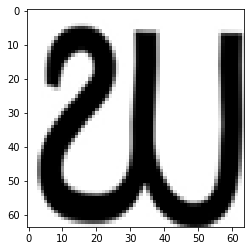

In [ ]:
plt.imshow(x[100])

In [58]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
#model.add(Conv2D(32, (3, 3), activation = 'relu'))
#model.add(MaxPooling2D(2, 2))

model.add(Flatten())
#model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 87, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
722/722 [==============================] - 7s 10ms/step - loss: 2.3033 - accuracy: 0.4619 - val_loss: 0.9582 - val_accuracy: 0.7293
Epoch 2/20
722/722 [==============================] - 6s 9ms/step - loss: 0.4905 - accuracy: 0.8407 - val_loss: 0.7039 - val_accuracy: 0.7762
Epoch 3/20
722/722 [==============================] - 6s 8ms/step - loss: 0.3000 - accuracy: 0.9003 - val_loss: 0.8355 - val_accuracy: 0.7624
Epoch 4/20
722/722 [==============================] - 6s 9ms/step - loss: 0.2037 - accuracy: 0.9370 - val_loss: 0.7027 - val_accuracy: 0.7873
Epoch 5/20
722/722 [==============================] - 6s 9ms/step - loss: 0.1874 - accuracy: 0.9328 - val_loss: 0.4954 - val_accuracy: 0.8370
Epoch 6/20
722/722 [==============================] - 6s 9ms/step - loss: 0.1023 - accuracy: 0.9647 - val_loss: 0.5513 - val_accuracy: 0.8370
Epoch 7/20
722/722 [==============================] - 6s 8ms/step - loss: 0.0891 - accuracy: 0.9695 - val_loss: 0.6116 - val_accuracy: 0.8453
Epoch

KeyboardInterrupt: ignored

In [59]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
822/822 [==============================] - 7s 8ms/step - loss: 1.9743 - accuracy: 0.5298 - val_loss: 0.6117 - val_accuracy: 0.8361
Epoch 2/2
822/822 [==============================] - 6s 7ms/step - loss: 0.4316 - accuracy: 0.8747 - val_loss: 0.4967 - val_accuracy: 0.8689
-> 1
Epoch 1/2
822/822 [==============================] - 6s 7ms/step - loss: 0.2935 - accuracy: 0.9063 - val_loss: 0.3695 - val_accuracy: 0.9126
Epoch 2/2
822/822 [==============================] - 7s 9ms/step - loss: 0.1685 - accuracy: 0.9501 - val_loss: 0.2261 - val_accuracy: 0.9180
-> 2
Epoch 1/2
822/822 [==============================] - 6s 8ms/step - loss: 0.1554 - accuracy: 0.9519 - val_loss: 0.2709 - val_accuracy: 0.9344
Epoch 2/2
822/822 [==============================] - 6s 7ms/step - loss: 0.1223 - accuracy: 0.9592 - val_loss: 0.2222 - val_accuracy: 0.9235
-> 3
Epoch 1/2
822/822 [==============================] - 6s 7ms/step - loss: 0.1264 - accuracy: 0.9580 - val_loss: 0.0498 - val_accuracy: 

In [62]:
model.save_weights("Model_Kawi_FIX.h5")

In [ ]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

32/32 [==============================] - 1s 26ms/step
0.992
[[ 6  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        10
           4       1.00      0.77      0.87        13
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        16
          13       1.00    

In [ ]:
daftar_huruf[62]

'/content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_ADEG'

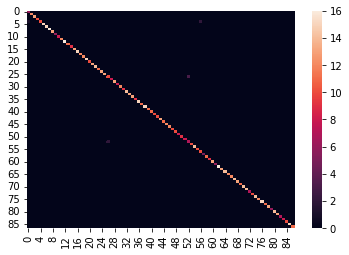

In [61]:
import seaborn as sns

sns.heatmap(cm)